<a href="https://colab.research.google.com/github/StevenTaruc/LeagueOfLegendsAnalysis/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
* Data 301 Final Project
* Steven Taruc, Josiah Lashley




In [0]:
import requests 
import json
import time
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

In [5]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


# Machine Learning Analysis

In [0]:
df_games = pd.read_csv('/drive/My Drive/games.csv')
df_gs = pd.read_csv('/drive/My Drive/game_stats.csv')

## Simple Linear Regression on damage to others vs. damage taken

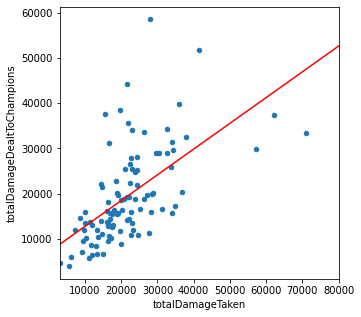

In [9]:
X_train = df_gs[['totalDamageTaken']]  
y_train = df_gs['totalDamageDealtToChampions']

model = LinearRegression()
model.fit(X=X_train, y=y_train)

X_new = pd.DataFrame()
X_new["totalDamageTaken"] = np.linspace(3000,80000,num = 50)

y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["totalDamageTaken"]
)

df_gs.plot.scatter(x="totalDamageTaken", y="totalDamageDealtToChampions")
y_new_.plot.line(c = 'red')

In [10]:
model.score(X=X_train,y=y_train)

0.3530405561675627

In [11]:
scores = -cross_val_score(model, 
                         X=X_train,
                         y=y_train,
                         scoring="neg_mean_squared_error",
                         cv=10)
np.sqrt(scores.mean())

8668.7789915207

## Predicting Win Probability using Pre-match Attributes

In [12]:
X_train = df_gs[['champion_name',
                 'role',
                 'lane']].fillna('none')       
y_train = df_gs['win'].fillna('none')

pipeline = make_pipeline(make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['champion_name','role','lane'])),
    StandardScaler(with_mean=False),
    KNeighborsClassifier(n_neighbors=10)
)

pipeline.fit(X = X_train, y = y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['champion_name', 'role',
                                                   'lane'])],
                                   verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, w

In [0]:
role_counts = df_games['role'].value_counts()
most_used_role = role_counts[[0]].index[0]

lane_counts = df_games['lane'].value_counts()
most_used_lane = lane_counts[[0]].index[0]

champ_counts = df_games['champion_name'].value_counts()
most_used_champ = champ_counts[[0]].index[0]

In [16]:
test1 = pd.DataFrame({
    'champion_name':[most_used_champ],
    'role':[most_used_role],
    'lane':[most_used_lane]
})
test1

,champion_name,role,lane
0,Kalista,SOLO,TOP


In [17]:
pipeline.predict_proba(test1)

array([[0.6, 0.4]])

We are able to setup a k-nearest neighbors classifier that predicts game outcome from pre-match attributes. Using our most used champion, role, and lane from our collected data of 100 matches, we predict to have a 60% chance of winning and 40% chance of losing a match. 

In [18]:
is_win = (y_train == True)

accuracy_scores = cross_val_score(pipeline, X_train, y_train, 
                            cv=10, scoring="accuracy")

precision_scores = cross_val_score(pipeline, X_train, is_win, 
                cv=10, scoring="precision")

recall_scores = cross_val_score(pipeline, X_train, is_win, 
                cv=10, scoring="recall")

accuracy_scores.mean(), precision_scores.mean(), recall_scores.mean()

(0.5299999999999999, 0.5916666666666666, 0.36333333333333334)

However, our model is not a good predictor of game outcome. Calculating our model accuracy, precision, and recall, we see that the pre-game decisions are not the best for determining whether you'll win or lose a match. 

# Machine Learning on models between Josiah and Gbay

**My data will be on ranked games**


**Gbay is a famous league of legends youtuber and it will also be on ranked games**

In [0]:
df_me_ranked = pd.read_csv('/drive/My Drive/me_ranked.csv')
df_gbay_ranked = pd.read_csv('/drive/My Drive/gbay_ranked.csv')

In [20]:
df_plot = df_gbay_ranked[df_gbay_ranked["type"] == "CHAMPION_KILL"]
df_plot["map.y"] = (15000 - df_plot["position.y"]) / 29.3
df_plot["map.x"] = df_plot["position.x"] / 29.3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Looking at kills before and after 17 mins
df_kills = df_plot[df_plot["kill"] == 1]
df_k00 = df_kills[df_kills["minute"] < 17]
df_k17 = df_kills[(df_kills["minute"] >= 17)]

In [0]:
df_me = df_me_ranked[df_me_ranked["minute"].notna()]
df_me_10 = df_me[df_me["minute"]>10]

In [0]:
df_gbay = df_gbay_ranked[df_gbay_ranked["minute"].notna()]
df_gbay_10 = df_gbay[df_gbay["minute"]>10]

In [24]:
features = ["tower_assisting", "tower_kill", "kill", "death","level_up","assist",
            "minute","kills","deaths","level","kill_participation","tower_kills",
            "team_participation"]

model1 = make_pipeline(
  StandardScaler(with_mean=False),
  MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000)
  )

model1.fit(X=df_gbay_10[features],y=df_gbay_10["win"])

cv_errs = cross_val_score(model1,X=df_gbay_10[features],
                                  y=df_gbay_10["win"],
                                  scoring="f1_macro", 
                                  cv=30)
cv_errs.mean()

0.7127732351437192

In [25]:
features = ["tower_assisting", "tower_kill", "kill", "death","level_up","assist",
            "minute","kills","deaths","level","kill_participation","tower_kills",
            "team_participation"]

model2 = make_pipeline(
  StandardScaler(with_mean=False),
  MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000)
  )

model2.fit(X=df_me_10[features],y=df_me_10["win"])

cv_errs = cross_val_score(model2,X=df_me_10[features],
                                  y=df_me_10["win"],
                                  scoring="f1_macro", 
                                  cv=30)
cv_errs.mean()

0.6900587943534472